In [1]:
from ppopt.mplp_program import MPLP_Program
from ppopt.mpmodel import MPModeler
from ppopt.mp_solvers.solve_mpqp import solve_mpqp, mpqp_algorithm
from ppopt.plot import parametric_plot
from pyomo.environ import *
import pyomo.environ as pyo
# from numpy.polynomial.legendre import leggauss
# from scipy.optimize import linprog
# from collections import defaultdict
# import time
# import sympy as sp
# from sympy.logic.boolalg import BooleanTrue, BooleanFalse
from typing import List, Tuple
from collections import defaultdict
# import pickle
# import math
# import itertools
# import numpy as np
# from IPython.display import display

In [2]:
def get_sources(trans_list:List[Tuple], sinks:list):
    sources = {i: None for i in sinks}
    for sink in sinks:
        so_list = list()
        for pair in trans_list:
            if pair[1]==sink:
                so_list.append(pair[0])
        sources[sink] = so_list
    return sources

In [3]:
def get_sinks(trans_list:List[Tuple], sources:list):
    sinks = {i: None for i in sources}
    for source in sources:
        si_list = list()
        for pair in trans_list:
            if pair[0] == source:
                si_list.append(pair[1])
        sinks[source] = si_list
    return sinks

In [4]:
loc_indexes = [i for i in range(1,6)]
loc_capacities = [60, 60, 80, 40, 120]
markets = [5]
transports = [(1,3), (2, 3), (2, 4), (3, 5), (4, 3), (4, 5)]
trans_costs = [0.24, 0.37, 0.41, 0.29, 0.46, 0.33]
source_dict = get_sources(trans_list=transports, sinks=loc_indexes)
sink_dict = get_sinks(trans_list=transports, sources=loc_indexes)
loc_inters = [i for i in loc_indexes if (source_dict[i] and sink_dict[i])]

demand_bounds = {5: (70, 130)}
capf_bounds = {4:(0, 0.5)}
nt = 2

loc_capacities_dict = {j: loc_capacities[i] for i,j in enumerate(loc_indexes)}
trans_costs_dict = {j: trans_costs[i] for i,j in enumerate(transports)}

In [5]:
# model = MPModeler()
# 
# u = model.add_var('u')
# f = {(i[0],i[1]): model.add_var(name=f'f[{i[0]},{i[1]}]') for i in transports}
# 
# d = {m: model.add_param(name=f'd_{m}') for m in markets}
# capf = {i: model.add_param(name=f'capf_{i}') for i in capf_bounds}
# 
# model.add_constrs([(sum(f[so, si] for si in sink_dict[so]) if sink_dict[so] else sum(f[sp, so] for sp in source_dict[so])) <= (
#         capf[so] * loc_capacities_dict[so] + u if so in capf_bounds else loc_capacities_dict[so] + u) for so in loc_indexes])
# 
# model.add_constrs([sum(f[i, si] for si in sink_dict[i]) == sum(f[so, i] for so in source_dict[i]) for i in loc_inters])
# model.add_constrs([sum(f[so,m] for so in source_dict[m]) + u >= d[m] for m in markets])
# 
# model.add_constrs([f[i]>=0 for i in transports])
# 
# model.add_constrs(d[m] <= demand_bounds[m][1] for m in markets)
# model.add_constrs(d[m] >= demand_bounds[m][0] for m in markets)
# model.add_constrs(capf[l] <= capf_bounds[l][1] for l in capf_bounds)
# model.add_constrs(capf[l] >= capf_bounds[l][0] for l in capf_bounds)
# 
# # model.set_objective(sum(f[j]*trans_costs_dict[j] for j in transports))
# model.set_objective(u)
# prog = model.formulate_problem()
# prog.process_constraints()

In [6]:
# model = MPModeler()
# 
# # u = model.add_var('u')
# f = {(i[0],i[1]): model.add_var(name=f'f[{i[0]},{i[1]}]') for i in transports}
# 
# d = {m: model.add_param(name=f'd_{m}') for m in markets}
# capf = {i: model.add_param(name=f'capf_{i}') for i in capf_bounds}
# 
# model.add_constrs([(sum(f[so, si] for si in sink_dict[so]) if sink_dict[so] else sum(f[sp, so] for sp in source_dict[so])) <= (
#         capf[so] * loc_capacities_dict[so] if so in capf_bounds else loc_capacities_dict[so]) for so in loc_indexes])
# 
# model.add_constrs([sum(f[i, si] for si in sink_dict[i]) == sum(f[so, i] for so in source_dict[i]) for i in loc_inters])
# model.add_constrs([sum(f[so,m] for so in source_dict[m]) >= d[m] for m in markets])
# 
# model.add_constrs([f[i]>=0 for i in transports])
# 
# model.add_constrs(d[m] <= demand_bounds[m][1] for m in markets)
# model.add_constrs(d[m] >= demand_bounds[m][0] for m in markets)
# model.add_constrs(capf[l] <= capf_bounds[l][1] for l in capf_bounds)
# model.add_constrs(capf[l] >= capf_bounds[l][0] for l in capf_bounds)
# 
# model.set_objective(sum(f[j]*trans_costs_dict[j] for j in transports))
# prog = model.formulate_problem()
# prog.process_constraints()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-12-20


In [ ]:
model = MPModeler()

# u = model.add_var('u')
f = {(i[0],i[1]): model.add_var(name=f'f[{i[0]},{i[1]}]') for i in transports}
cap3 = model.add_var('cap3')

d = {m: model.add_param(name=f'd_{m}') for m in markets}
capf = {i: model.add_param(name=f'capf_{i}') for i in capf_bounds}

model.add_constrs([(sum(f[so, si] for si in sink_dict[so]) if sink_dict[so] else sum(f[sp, so] for sp in source_dict[so])) <= (
        capf[so] * loc_capacities_dict[so] if so in capf_bounds else loc_capacities_dict[so]) for so in loc_indexes])

model.add_constrs([sum(f[i, si] for si in sink_dict[i]) == sum(f[so, i] for so in source_dict[i]) for i in loc_inters])
model.add_constrs([sum(f[so,m] for so in source_dict[m]) >= d[m] for m in markets])

model.add_constrs([f[i]>=0 for i in transports])

model.add_constrs(d[m] <= demand_bounds[m][1] for m in markets)
model.add_constrs(d[m] >= demand_bounds[m][0] for m in markets)
model.add_constrs(capf[l] <= capf_bounds[l][1] for l in capf_bounds)
model.add_constrs(capf[l] >= capf_bounds[l][0] for l in capf_bounds)

model.set_objective(sum(f[j]*trans_costs_dict[j] for j in transports))
prog = model.formulate_problem()
prog.process_constraints()

In [8]:
solution = solve_mpqp(prog, mpqp_algorithm.combinatorial)

In [9]:
solution

Solution(program=<ppopt.mplp_program.MPLP_Program object at 0x000001C45F590C10>, critical_regions=[Critical region with active set [0, 1, 2, 4, 6, 9]
The Omega Constraint indices are [1, 2]
The Lagrange multipliers Constraint indices are []
The Regular Constraint indices are [[1, 3, 4], [5, 8, 10]]
  x(θ) = Aθ + b 
 λ(θ) = Cθ + d 
  Eθ <= f
 A = [[ 4.37733042e-17  0.00000000e+00]
 [ 1.72344268e-16  0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00]
 [ 6.56285515e-17  0.00000000e+00]
 [-6.34187892e-17  0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00]] 
 b = [[ 6.00000000e+01]
 [ 2.00000000e+01]
 [-8.00000000e+01]
 [ 8.00000000e+01]
 [-1.10566857e-14]
 [-8.00000000e+01]] 
 C = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 
 d = [[0.74      ]
 [0.71014083]
 [0.13      ]
 [0.08      ]
 [1.2817176 ]
 [0.5       ]] 
 E = [[ 0.02499219 -0.99968765]
 [-1.          0.        ]
 [-1.          0.        ]
 [ 0.          1.        ]
 [ 0.         -1.        ]] 
 f = [[  1.99937529]
 [-8

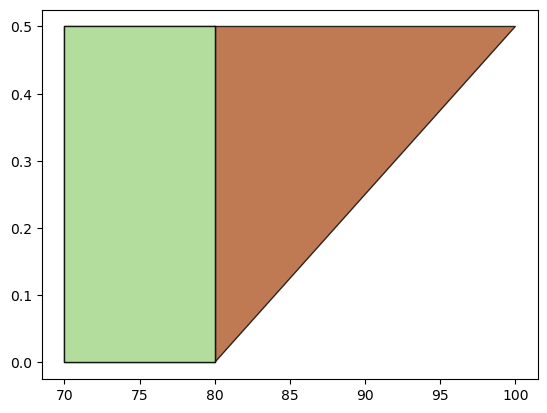

In [10]:
parametric_plot(solution, show=True)

In [11]:
len(solution)

3